# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

9

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
# creating base urls for APIs
url = "http://api.openweathermap.org/data/2.5/weather?"

# For each city create URL and the API request
for city in cities:
    
    query_url = f'{url}appid={weather_api_key}&units=imperial&q={city}'
    city_weather = requests.get(query_url).json()
    
    try: 
        
        city_list.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        print(f'Processing {cities.index(city)}: {city}')
    except:
        print(f"We could not find {city}")
        pass

Processing 0: albany
Processing 1: lagoa
Processing 2: ushuaia
Processing 3: castro
Processing 4: yellowknife
Processing 5: hobart
Processing 6: qaanaaq
Processing 7: butaritari
We could not find samusu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# making dataframe to store weather data
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,100,US,1612722095,74,42.6001,-73.9662,30.00,4.45
1,Lagoa,100,PT,1612722423,74,39.0500,-27.9833,57.85,20.69
2,Ushuaia,40,AR,1612722191,47,-54.8000,-68.3000,59.00,12.66
3,Castro,0,BR,1612722317,42,-24.7911,-50.0119,76.26,3.80
4,Yellowknife,1,CA,1612722401,66,62.4560,-114.3525,-40.00,5.75
5,Hobart,1,AU,1612722117,58,-42.8794,147.3294,53.60,5.75
6,Qaanaaq,99,GL,1612722396,87,77.4840,-69.3632,11.64,4.79
7,Butaritari,70,KI,1612722401,80,3.0707,172.7902,80.73,18.66


In [7]:
# exporting to a csv file
city_weather_df.to_csv("cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df['Humidity'].max()

87

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(city_weather_df.loc[city_weather_df['Humidity'] > 100].index, inplace=False)

In [10]:
# checking the new cleaned dataset
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,100,US,1612722095,74,42.6001,-73.9662,30.00,4.45
1,Lagoa,100,PT,1612722423,74,39.0500,-27.9833,57.85,20.69
2,Ushuaia,40,AR,1612722191,47,-54.8000,-68.3000,59.00,12.66
3,Castro,0,BR,1612722317,42,-24.7911,-50.0119,76.26,3.80
4,Yellowknife,1,CA,1612722401,66,62.4560,-114.3525,-40.00,5.75
5,Hobart,1,AU,1612722117,58,-42.8794,147.3294,53.60,5.75
6,Qaanaaq,99,GL,1612722396,87,77.4840,-69.3632,11.64,4.79
7,Butaritari,70,KI,1612722401,80,3.0707,172.7902,80.73,18.66


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

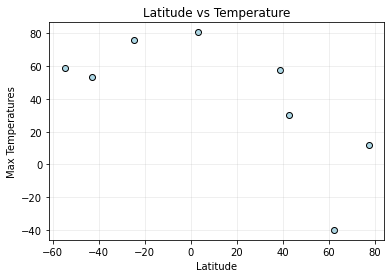

In [15]:
# scatter plot of latitude vs temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Temperature')
plt.ylabel('Max Temperatures')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsTemp.png')
plt.show()

This plot is showing that highest temperatures seem to be closest to the equator, and the farther north you go the colder it gets while the farther south you go the warmer it gets.

## Latitude vs. Humidity Plot

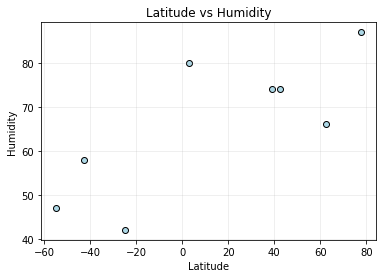

<Figure size 432x288 with 0 Axes>

In [12]:
# scatter plot of latitude vs humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsHumidity.png')
plt.show()

There does not seem to be any strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

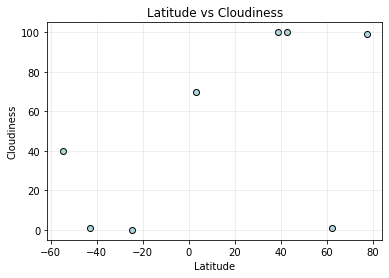

In [16]:
# scatter plot of latitude vs Cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsCloud.png')
plt.show()

From this plot it seems that cloudiness is not affected by the latitude and is evenly dispersed.  

## Latitude vs. Wind Speed Plot

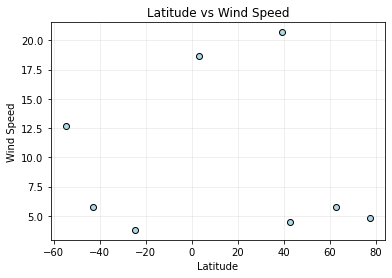

In [17]:
# scatter plot of latitude vs Wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(alpha=.25)

plt.savefig('../Images/LatvsWind.png')
plt.show()

This plot shows that wind speed widely distributed across the latitude.

## Linear Regression

In [42]:
# creating dataFrames of the northern and southern hemispheres to make it easier for analysis 
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

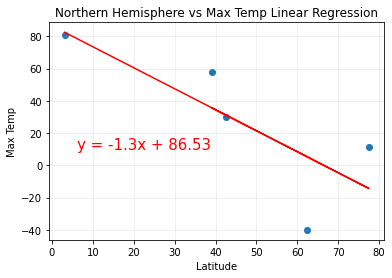

In [43]:
# Linear Regression for north hemisphere and max temperature
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.25)
plt.show()                     

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

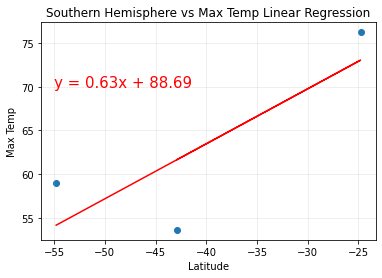

In [56]:
# Linear Regression for south hemisphere and max temperature
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(alpha=.25)
plt.show()   

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

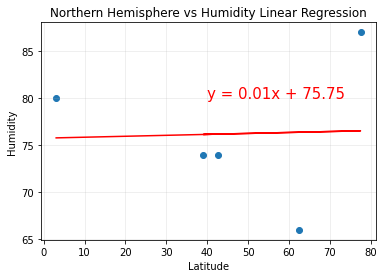

In [55]:
# Linear Regression for north hemisphere and humidity
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.25)
plt.show()   

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

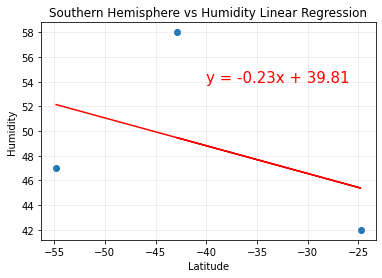

In [54]:
# Linear Regression for south hemisphere and humidity
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,54),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.25)
plt.show()   

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

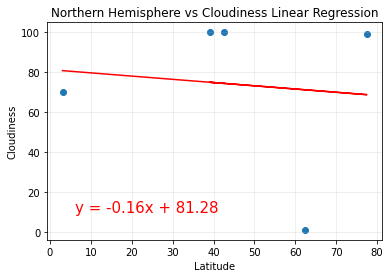

In [47]:
# Linear Regression for north hemisphere and cloudiness
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.25)
plt.show()   

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

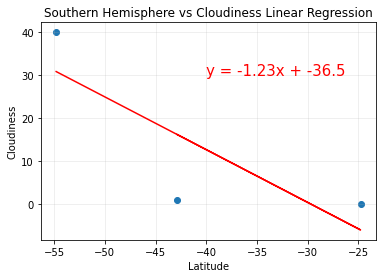

In [53]:
# Linear Regression for south hemisphere and cloudiness
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(alpha=.25)
plt.show()   

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

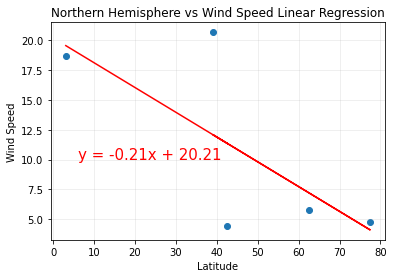

In [49]:
# Linear Regression for north hemisphere and wind speed
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Northern Hemisphere vs Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.25)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

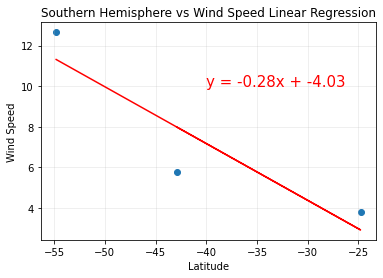

In [52]:
# Linear Regression for south hemisphere and wind speed
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

plt.title("Southern Hemisphere vs Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(alpha=.25)
plt.show()